<a href="https://colab.research.google.com/github/balkisdirahoui/pldac-/blob/main/Tahce_Healthy_Coat_Donn%C3%A9es_R%C3%A9els_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import tree
from sklearn.model_selection import train_test_split
import math
import timeit
import time
import matplotlib.pyplot as plt
from sklearn import datasets
from google.colab import drive
from sklearn.svm import LinearSVC
drive.mount('/content/drive')
import sys 
sys.path.append('/content/drive/MyDrive/utilitaire')
import pandas as pd 

#%load_ext autoreload
#%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Main

In [5]:

class main :

  """modele : objet de la classe medele 
  """
  #modele = modele(data,params,metric)
    

In [6]:
class classifieur:
  
    def __init__(self,data,param_modele,param_split):
        self.data =data
        self.param_modele = param_modele
        self.param_split = param_split

        
    def fit(X,y):
        pass
    def predict(X):
        pass
    def score(X,y):
        pass
    
    def split(self):
        pass

        

### KNN

In [7]:

class knn(classifieur):
    """
    params = {"n_neigbors" : 2, "metric" : 'cosine' } par exemple
    param_modele : les parametres propres a un modeles 
    param_split : la taille du test et du train 
    """
    
    def __init__(self,data,param_modele,param_split):
        super().__init__(data,param_modele, param_split)
        for key in param_modele:
            setattr(self,key,param_modele[key])
            
        self.clf = KNN(**param_modele)
        
        if param_split is not None: 
          self.X_train,  self.X_test, self.y_train, self.y_test = train_test_split(data[:,:-1],data[:,-1], **param_split)
        else:
          self.X_train,self.y_train = data[:,:-1], data[:,-1]
       

    def fit(self):
      self.clf.fit(self.X_train,self.y_train)
       
    def predict(self,X):
      
      if param_split is not None:
          return self.clf.predict(self.X_test)
      else:
        return self.clf.predict(X)
    def score(self):
      
        return self.clf.score(self.X_test,self.y_test)


In [8]:
def genere_dataset_gaussian(positive_center,positive_sigma,negative_center,negative_sigma,nb_points):
    data_pos= np.random.multivariate_normal(positive_center, positive_sigma, nb_points)
    data_neg= np.random.multivariate_normal(negative_center, negative_sigma, nb_points)

    data_label=np.asarray([-1 for i in range (nb_points)] +[+1 for i in range(nb_points)])
    
    data_decs=np.vstack((data_neg,data_pos))
    return data_decs,data_label     


X2, y2 = genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)

data2=np.hstack((X2,np.reshape(y2,(20,1))))# gaussian
param_modele = {"n_neighbors" : 2, "metric" : 'cosine'}
param_split  = {"test_size" : 0.33 , "random_state" : 42}
K = knn(data2, param_modele, param_split )
K.fit()
print(K.score())

0.7142857142857143


In [9]:
prams = {"n_neighbors" : 2, "metric" : 'cosine' }

### SVM

In [10]:

class SVM(classifieur):
    """
    param_modele : les parametres propres a un modeles 
    param_split : la taille du test et du train 
    """
    
    def __init__(self,data,param_modele,param_split):
        super().__init__(data,param_modele, param_split)
        for key in param_modele:
            setattr(self,key,param_modele[key])
            
        self.clf =LinearSVC(**param_modele)
        
        if param_split is not None: 
          self.X_train,  self.X_test, self.y_train, self.y_test = train_test_split(data[:,:-1],data[:,-1], **param_split)
        else:
          self.X_train,self.y_train = data[:,:-1], data[:,-1]
       

    def fit(self):
      self.clf.fit(self.X_train,self.y_train)
       
    def predict(self,X):
      
      if param_split is not None:
          return self.clf.predict(self.X_test)
      else:
        return self.clf.predict(X)
    def score(self):
      
        return self.clf.score(self.X_test,self.y_test)



In [11]:

prams_modele = {'random_state' : 0, 'tol' : 1e-05}

### Decision trees

In [12]:
class dtrees(classifieur):
    
    
    def __init__(self,data,param_modele,param_split):
        super().__init__(data,param_modele, param_split)
        for key in param_modele:
            setattr(self,key,param_modele[key])
            
        self.clf = tree.DecisionTreeClassifier(**param_modele)

        self.X_train,  self.X_test, self.y_train, self.y_test = train_test_split(data[:,:-1],data[:,-1], **param_split)
    
   
    def fit(self):
        self.clf.fit(self.X_train, self.y_train )
    def predcit(self):
        return self.clf.predict(self.X_test)
    def score(self):
        return self.clf.score(self.X_test,self.y_test)
    
    


In [13]:
param_split  = {"test_size" : 0.33 , "random_state" : 42}
params_dtree= {"max_depth" : 3  } 
dtree = dtrees(data2,params_dtree,param_split)
dtree.fit()
dtree.max_depth
dtree.score()

0.7142857142857143

### CoAt

In [14]:
from random import randrange
 
# Split a dataset into a train and test set
def my_train_test_split(dataset, split=0.60):
	train = list()
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy

class coAT(classifieur):

    def __init__(self, data,param_modele ,param_split=dict()): 
      super().__init__(data, param_modele ,param_split)
      for key in param_modele:
          setattr(self,key,param_modele[key])
      self.CB = data
      self.param_split = param_split
   
     
       
    
    def set_sigS(self,sigS):
      self.sigS = sigS
        
    def set_sigR(self,sigR):
      
      self.sigR = sigR
    #fit
    def fit(self):
       print(self.CB)
       if self.param_split is not None: 
        #self.CB = train
        self.train,   self.test = my_train_test_split(self.CB, **param_split)
        self.train = self.CB
       
     

      
    
      
    #predict
    def change_outcomes(self,x,y):
      return (x,y)
    def predict(self,x):
      """
      prend en entrée un tuple x et retourne son label 
      (label qui minimise la complexité)
      """
      l = []
      times = []
     
      
      for y in self.labels:
        tuple =  self.change_outcomes(x,y)
        l.append(self.inv(tuple,self.CB,self.w))
   
      return self.labels[np.argmin(l)],self.labels,l


    
    def predict_all(self,list_x):
      """
      x : np array
      """
      pred = []
    
      for x in list_x:
        #append label
       
        pred.append(self.predict(x[0])[0])

      return np.array(pred)
      



    def score(self):
      X,y = zip(*self.test)
      pred = self.predict_all(self.test)
      print("predict all",pred)
      print(np.array(list(y)))
      return np.where(np.array(list(y))== pred,1,0).mean()
    
    #autre 
    def inv(self,s0, CB,w):
      """
      fonction qui calcule la cardinalité de l'ensemble ou sigmaS et sigmaR sont iversé pour un s0
      sigS : mesure de similarité 1
      sigR : mesure de similarité 2
      -> faire l'autre moitié des tests
      -> mettre les Sig dans des variable
      """
      cpt=0
      #parcourir les tuples du dataset 
      for si in  range(len(CB))  :
        for sj in range(si+1,len(CB)) :
          #########
          #CB[si] = [()]
          #CB[si][0] = () le reste dependra de la fonction de similarité (dimensions)
          sigS_si = self.sigS(s0[0],CB[si][0],self.w)
          sigS_sj = self.sigS(s0[0],CB[sj][0],self.w)
          sigR_si = self.sigR(s0[1],CB[si][1])
          sigR_sj = self.sigR(s0[1],CB[sj][1])
          ########
          #incrementer si inversion de similarité (sigR se base sur les labels)
          if( (sigS_si>=sigS_sj) and (sigR_si<sigR_sj)) or ( (sigS_si<sigS_sj) and (sigR_si>=sigR_sj)): 
            cpt+=1    
      return cpt
    def complex(self,CB):
      """
      fonction qui calcule la complexité d'un CB (dataset)
      """
      gamma=0
      for s0 in CB:
          gamma += self.inv(s0,CB,self.w)
      return gamma

    def predict_nonopt(self,x):
      """
      prend en entrée un tuple x et retourne son label 
      (label qui minimise la complexité)
      """
      l = []
 
      for y in self.labels:
        tmp = self.CB + [self.change_outcomes(x,y)]
        start_time = time.time()
        l.append(self.complex(tmp))
      
      return self.labels[np.argmin(l)],self.labels,l


  
# CoAT n'est pas ordinal 
# CCBI l'est


### Similarities

In [15]:
def sigmaArea(a1,a2):
  """
  retourne la similarité entre deux areas (int)
  """
  return(int(a1==a2))
####
#Nb rooms
def polynomialSim(n,L,y,x):
  
  return ((L-abs(y-x)**n)/(L**n))

def sigmaNbrooms(nb1,nb2):
  """
  Sigma nb rooms, mesure de similarité de nb rooms
  """
  return polynomialSim(2,6,nb1,nb2)

def sigmaS(a,b,w):
  """
  w : list of weights
  a : list [nbrooms1,area1]
  b : list [nbrooms2,area2]
  """
  nb_rooms1 , area1= a[0],a[1]
  nb_rooms2 , area2= b[0],b[1]
  #weights between 0.01 and 0.64
  sigmaAr=sigmaArea(area1,area2)
  sigmarooms = sigmaNbrooms(nb_rooms1,nb_rooms2)
  return w[0]*sigmarooms + (1-w[1])*sigmaAr

def sigmaR(p1,p2):
  return polynomialSim(2,1000,p1,p2)

In [16]:
#données
"""
situation : 0,1,2,
nb_rooms : 1,2,3
area : 0:midtown ,1 : downtown
price: 
"""
X_coat = np.array([[1,0], [2,0],[1,1],[3,1]])
y_coat = np.array([440,600,700,900])


#constuire les données
CB_coAt=[]
for i in range(len(X_coat)):
  CB_coAt.append((X_coat[i].tolist(),y_coat[i]))


In [17]:
#modele
param_modele = {"sigS" : sigmaS, "sigR" : sigmaR,"w":[0.5,0.5],"labels" : [440,600,700,900] + (np.arange(400,1200,100)).tolist()}
co= coAT(CB_coAt,param_modele,param_split = None  )
#fit
co.fit()
#predict
label,labels,gamma = co.predict([2, 1])
labeln,labelsn,gamman = co.predict_nonopt([2, 1])
print("le meilleur prix est : ",label)

[([1, 0], 440), ([2, 0], 600), ([1, 1], 700), ([3, 1], 900)]
le meilleur prix est :  800


{440: 5, 600: 3, 700: 1, 900: 1, 400: 5, 500: 5, 800: 0, 1000: 1, 1100: 1}


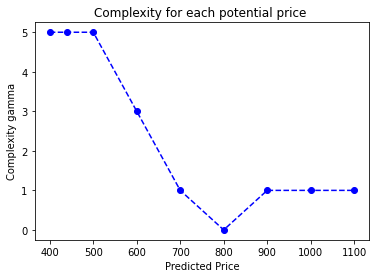

In [18]:
d = dict()
for l,g in zip(labels,gamma):
  d[l] = g
print(d)
lists = sorted(d.items())
labels,gamma = zip(*lists)


plt.xlabel('Predicted Price')
plt.ylabel('Complexity gamma')
plt.title('Complexity for each potential price ')
plt.plot(labels,gamma,'bo--')
plt.show()

{440: 18, 600: 12, 700: 8, 900: 10, 400: 17, 500: 16, 800: 5, 1000: 10, 1100: 11}


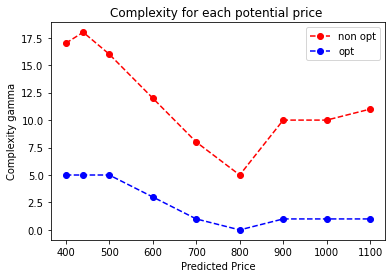

In [19]:
d2 = dict()
for l,g in zip(labelsn,gamman):
  d2[l] = g
print(d2)
lists = sorted(d2.items())
labelsn,gamman = zip(*lists)
plt.xlabel('Predicted Price')
plt.ylabel('Complexity gamma')
plt.title('Complexity for each potential price ')
plt.plot(labelsn,gamman,'ro--',label="non opt")
plt.plot(labels,gamma,'bo--',label="opt")
plt.legend()
plt.show()



### Variation du temps et données iris

In [ ]:


# import some data to play with
iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # we only take the first two features.
y_iris = iris.target
CB_iris=[]
for i in range(len(X_iris)-10, len(X_iris)):
  CB_iris.append((X_iris[i],y_iris[i]))
print(CB_iris)


def sigS(s1,s2,w =None):
  if isinstance(s1, np.ndarray): 
    return ((np.abs(s1-s2)).sum())**2
  return (np.abs(s1-s2))**2
  # (np.abs(s1-s2)) ou (np.abs(s1-s2))^2
  
def sigR(o1,o2,w = None):


  return (np.abs(o1-o2))**2
#modele
param_modele = {"sigS" : sigS, "sigR" : sigR,"w":None,"labels" : y_iris}
co= coAT(CB_iris,param_modele ,param_split = None)
#fit
co.fit()
#predict
label,labels,gamma = co.predict(np.array([6.7, 3.1]))


[(array([6.7, 3.1]), 2), (array([6.9, 3.1]), 2), (array([5.8, 2.7]), 2), (array([6.8, 3.2]), 2), (array([6.7, 3.3]), 2), (array([6.7, 3. ]), 2), (array([6.3, 2.5]), 2), (array([6.5, 3. ]), 2), (array([6.2, 3.4]), 2), (array([5.9, 3. ]), 2)]
[(array([6.7, 3.1]), 2), (array([6.9, 3.1]), 2), (array([5.8, 2.7]), 2), (array([6.8, 3.2]), 2), (array([6.7, 3.3]), 2), (array([6.7, 3. ]), 2), (array([6.3, 2.5]), 2), (array([6.5, 3. ]), 2), (array([6.2, 3.4]), 2), (array([5.9, 3. ]), 2)]


In [ ]:



X_iris = iris.data[:, :]  # we only take the first two features.
y_iris = iris.target
CB_iris=[]
for i in range(len(X_iris)-10, len(X_iris)):
  CB_iris.append((X_iris[i],y_iris[i]))
param_modele = {"sigS" : sigS, "sigR" : sigR,"w":None,"labels" : y_iris}
def plot_coat():
  
  d = dict() #dictionnaire de temps en fonction du nombre de features
  for n in range(1,150):
    X_iris = iris.data[:n, :]  # we only take the first n features.
    y_iris = iris.target
    CB_iris=[]
    print(n)
    for i in range(0, len(X_iris)):

      CB_iris.append((X_iris[i],y_iris[i]))
    co= coAT(CB_iris,param_modele ,param_split = None)
    co.fit()
    test =  np.random.randn(X_iris.shape[1],)
    start_time = time.time()
    label,labels,gamma = co.predict(test)
    d[n] = (time.time()-start_time)




In [ ]:

def plot_nontopt():
  d2= dict() #dictionnaire de temps en fonction du nombre de features
  for n in range(1,50):
    X_iris = iris.data[:n, :]  # we only take the first n features.
    y_iris = iris.target
    CB_iris=[]
    print(n)
    for i in range(0, len(X_iris)):

      CB_iris.append((X_iris[i],y_iris[i]))
    co= coAT(CB_iris,param_modele,param_split = None )
    co.fit()
    test =  np.random.randn(X_iris.shape[1],)
    start_time = time.time()
    label,labels,gamma = co.predict_nonopt(test)
    d2[n] = (time.time()-start_time)

    lists = sorted(d2.items())
    labels2,times2 = zip(*lists)
    plt.xlabel('Nombre d exemples')
    plt.ylabel('temps dexecution')
    plt.title('Temps dexecution non optimisé')
    plt.plot(labels2,times2,'og',label = 'temps non opt ')
    plt.legend()
    plt.show()
 



## Optimisé

In [ ]:
"""
coeffs = np.polyfit(labels, times1, 2)
p = np.poly1d(coeffs)
plt.xlabel('Nombre d exemples')
plt.ylabel('temps dexecution')
plt.title('Time variation ')
plt.plot(labels,times1,'ob',label = 'temps  dexecution fonction optimisé')
plt.plot(labels, [p(n) for n in labels],'-r')
plt.legend()
plt.show()

#plt.savefig("/content/drive/MyDrive/PLDAC/Step 2 /Images/coAT/temps execution selon temps + line final")
"""

'\ncoeffs = np.polyfit(labels, times1, 2)\np = np.poly1d(coeffs)\nplt.xlabel(\'Nombre d exemples\')\nplt.ylabel(\'temps dexecution\')\nplt.title(\'Time variation \')\nplt.plot(labels,times1,\'ob\',label = \'temps  dexecution fonction optimisé\')\nplt.plot(labels, [p(n) for n in labels],\'-r\')\nplt.legend()\nplt.show()\n\n#plt.savefig("/content/drive/MyDrive/PLDAC/Step 2 /Images/coAT/temps execution selon temps + line final")\n'

### Non opt

{1: 0.0063626766204833984, 2: 0.019120454788208008, 3: 0.04504060745239258, 4: 0.0905294418334961, 5: 0.16953492164611816, 6: 0.27661800384521484, 7: 0.4374523162841797, 8: 0.6227967739105225, 9: 0.7994117736816406, 10: 1.1117026805877686, 11: 1.493931770324707, 12: 1.84083890914917, 13: 2.311582326889038, 14: 2.88771653175354, 15: 3.5896120071411133, 16: 4.245651721954346, 17: 5.06240439414978, 18: 5.91916561126709, 19: 6.868001699447632, 20: 8.016778230667114, 21: 9.811227560043335, 22: 10.620286703109741, 23: 12.100168466567993, 24: 13.935007095336914, 25: 15.196414470672607, 26: 17.046086072921753, 27: 19.003201246261597, 28: 21.275818586349487, 29: 23.57440686225891, 30: 26.048505544662476, 31: 28.661365032196045, 32: 31.558324337005615, 33: 33.95329976081848, 34: 37.119659185409546, 35: 40.67254614830017, 36: 43.57988119125366, 37: 47.44268012046814, 38: 51.231197118759155, 39: 55.19628715515137, 40: 59.44977951049805, 41: 64.00247859954834, 42: 68.9209418296814, 43: 73.370059251

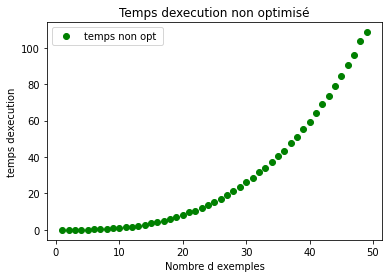

<Figure size 432x288 with 0 Axes>

In [ ]:


print(d2)
lists = sorted(d2.items())
labels2,times2 = zip(*lists)

plt.xlabel('Nombre d exemples')
plt.ylabel('temps dexecution')
plt.title('Temps dexecution non optimisé')
plt.plot(labels2,times2,'og',label = 'temps non opt ')
plt.legend()
plt.show()
plt.savefig("/content/drive/MyDrive/PLDAC/Step 2 /Images/coAT/non opt temps execution final")

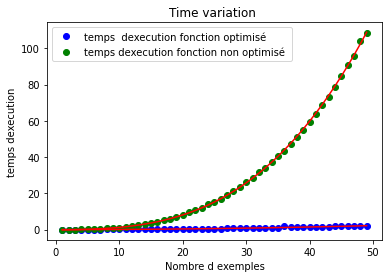

<Figure size 432x288 with 0 Axes>

In [ ]:
degree1 = 2
coeffs = np.polyfit(labels, times1, degree1)
p1 = np.poly1d(coeffs)
degree2 = 3
coeffs2 = np.polyfit(labels2, times2, degree2)
p2 = np.poly1d(coeffs2)
plt.xlabel('Nombre d exemples')
plt.ylabel('temps dexecution')
plt.title('Time variation ')
plt.plot(labels,times1,'ob',label = 'temps  dexecution fonction optimisé')
plt.plot(labels2,times2,'og',label = 'temps dexecution fonction non optimisé ')
plt.plot(labels, [p1(n) for n in labels],'-r')
plt.plot(labels, [p2(n) for n in labels],'-r')
plt.legend()
plt.show()
plt.savefig("/content/drive/MyDrive/PLDAC/Step 2 /Images/coAT/temps opt vs non final")

### CoAT vs KNN

#### KNN 

In [ ]:

K = knn(data2, param_modele, param_split )
K.fit()

#print(K.score())





NameError: ignored

In [ ]:
iris = datasets.load_iris()

X_iris = iris.data[:, :]  # we only take the first two features.
y_iris = iris.target
param_modele = {"n_neighbors" : 2, "metric" : 'cosine'}
param_split  = None
data =np.hstack((X_iris,np.reshape(y_iris,(X_iris.shape[0],1))))
K = knn(data, param_modele, param_split = None )
K.fit()
#ict()

In [ ]:

d_knn = dict() #dictionnaire de temps en fonction du nombre de features

for n in range(2,150):
  X_iris = iris.data[:n, :]  # we only take the first n features.
  y_iris = iris.target[:n]
  data =np.hstack((X_iris,np.reshape(y_iris,(X_iris.shape[0],1))))
  K= knn(data, param_modele,param_split)
  K.fit()
  test =  (np.random.randn(X_iris.shape[1],)).reshape(1,-1)
  start_time = time.time()
  K.predict(test)
  d_knn[n] = (time.time()-start_time)

d_knn[1] = 0



{1: 0.0003075599670410156, 2: 0.0026023387908935547, 3: 0.008511066436767578, 4: 0.014269351959228516, 5: 0.02506399154663086, 6: 0.032381534576416016, 7: 0.043506622314453125, 8: 0.05735135078430176, 9: 0.08545923233032227, 10: 0.11896920204162598, 11: 0.11746978759765625, 12: 0.15925288200378418, 13: 0.17326068878173828, 14: 0.19516897201538086, 15: 0.22741413116455078, 16: 0.2628324031829834, 17: 0.306779146194458, 18: 0.3316330909729004, 19: 0.3671140670776367, 20: 0.4279623031616211, 21: 0.4529693126678467, 22: 0.5208985805511475, 23: 0.546212911605835, 24: 0.6057710647583008, 25: 0.6478900909423828, 26: 0.6909286975860596, 27: 0.8160254955291748, 28: 0.8313322067260742, 29: 0.8516988754272461, 30: 0.927459716796875, 31: 0.9850211143493652, 32: 1.083827018737793, 33: 1.0988378524780273, 34: 1.1944324970245361, 35: 1.2627723217010498, 36: 1.3328640460968018, 37: 1.4016773700714111, 38: 1.4854152202606201, 39: 1.585615634918213, 40: 1.7075748443603516, 41: 1.7586164474487305, 42: 3.

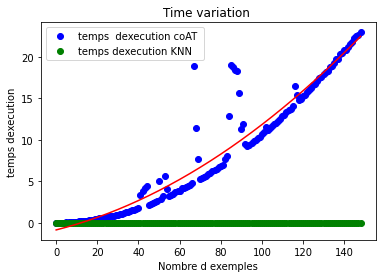

In [ ]:
print(d)
nb_exp = 149
lists = sorted(d.items())
_,times_coat = zip(*lists)
degree1 = 2
coeffs = np.polyfit(np.arange(nb_exp), times_coat, degree1)
p1 = np.poly1d(coeffs)
lists = sorted(d_knn.items())
_,times_knn = zip(*lists)

#p2 = np.poly1d(coeffs2)
plt.xlabel('Nombre d exemples')
plt.ylabel('temps dexecution')
plt.title('Time variation ')
plt.plot(np.arange(nb_exp),times_coat,'ob',label = 'temps  dexecution coAT ')
plt.plot(np.arange(nb_exp),times_knn,'og',label = 'temps dexecution KNN ')
plt.plot(np.arange(nb_exp), [p1(n) for n in np.arange(nb_exp)],'-r')

plt.legend()
plt.show()

## Comparaison des performances

In [ ]:
# performances knn
iris = datasets.load_iris()
X_iris = iris.data[:, :]  # we only take the first two features.
y_iris = iris.target
param_modele = {"n_neighbors" : 2, "metric" : 'cosine'}
param_split  = {"test_size" : 0.33 , "random_state" : 42}
data =np.hstack((X_iris,np.reshape(y_iris,(X_iris.shape[0],1))))
K = knn(data, param_modele, param_split  )
K.fit()
print(K.score())

0.98


In [ ]:
def polynomialSim(n,L,y,x):
  
  return ((L-abs(y-x)**n)/(L**n))

def sigmaNum(nb1,nb2):
  """
  Sigma nb rooms, mesure de similarité de nb rooms
  """
  return polynomialSim(2,10.0,nb1,nb2)



def sigmaS_iris(a,b,w):
  """
  w : list of weights
  a : list [nbrooms1,area1]
  b : list [nbrooms2,area2]
  """
  sepal_length1,sepal_width1,petal_length1,petal_width1= a[0],a[1],a[2],a[3]
  sepal_length2,sepal_width2,petal_length2,petal_width2= b[0],b[1],b[2],b[3]

  #weights between 0.01 and 0.64
  sigmaSL=sigmaNum(sepal_length1,sepal_length2)
  sigmaSW = sigmaNum(sepal_width1,sepal_width2)

  sigmaPL=sigmaNum(petal_length1,petal_length2)
  sigmaPW = sigmaNum(petal_width1,petal_width2)

  return w[0]*sigmaSL + (w[1])*sigmaPL+w[2]*sigmaPL+w[3]*sigmaPW

def sigmaR(p1,p2):
  return p1==p2

In [ ]:
#performances coat 
# split 
param_modele = {"sigS" : sigmaS_iris, "sigR" : sigmaR,"w":[0.25,0.25,0.25,0.25],"labels" : y_iris}
param_split  = {"split" : 0.61 }
X_iris = iris.data[:, :]  # we only take the first n features.
y_iris = iris.target
CB_iris = []
for i in range( 0,50):
  CB_iris.append((X_iris[i],y_iris[i]))
print(len(CB_iris))
co= coAT(CB_iris,param_modele,param_split )
co.fit()
print(co.score())


50
[(array([5.1, 3.5, 1.4, 0.2]), 0), (array([4.9, 3. , 1.4, 0.2]), 0), (array([4.7, 3.2, 1.3, 0.2]), 0), (array([4.6, 3.1, 1.5, 0.2]), 0), (array([5. , 3.6, 1.4, 0.2]), 0), (array([5.4, 3.9, 1.7, 0.4]), 0), (array([4.6, 3.4, 1.4, 0.3]), 0), (array([5. , 3.4, 1.5, 0.2]), 0), (array([4.4, 2.9, 1.4, 0.2]), 0), (array([4.9, 3.1, 1.5, 0.1]), 0), (array([5.4, 3.7, 1.5, 0.2]), 0), (array([4.8, 3.4, 1.6, 0.2]), 0), (array([4.8, 3. , 1.4, 0.1]), 0), (array([4.3, 3. , 1.1, 0.1]), 0), (array([5.8, 4. , 1.2, 0.2]), 0), (array([5.7, 4.4, 1.5, 0.4]), 0), (array([5.4, 3.9, 1.3, 0.4]), 0), (array([5.1, 3.5, 1.4, 0.3]), 0), (array([5.7, 3.8, 1.7, 0.3]), 0), (array([5.1, 3.8, 1.5, 0.3]), 0), (array([5.4, 3.4, 1.7, 0.2]), 0), (array([5.1, 3.7, 1.5, 0.4]), 0), (array([4.6, 3.6, 1. , 0.2]), 0), (array([5.1, 3.3, 1.7, 0.5]), 0), (array([4.8, 3.4, 1.9, 0.2]), 0), (array([5. , 3. , 1.6, 0.2]), 0), (array([5. , 3.4, 1.6, 0.4]), 0), (array([5.2, 3.5, 1.5, 0.2]), 0), (array([5.2, 3.4, 1.4, 0.2]), 0), (array([4.

In [ ]:
for i in range( len(X_iris)-5, len(X_iris)):
  print(X_iris[i],y_iris[i])

[6.7 3. ] 2
[6.3 2.5] 2
[6.5 3. ] 2
[6.2 3.4] 2
[5.9 3. ] 2


In [ ]:
print(CB_iris[3:5][0])

(array([6.8, 3.2]), 2)


In [ ]:
X,y = zip(*CB_iris)
print(X)
print(list(y))

(array([6.7, 3.1]), array([6.9, 3.1]), array([5.8, 2.7]), array([6.8, 3.2]), array([6.7, 3.3]), array([6.7, 3. ]), array([6.3, 2.5]), array([6.5, 3. ]), array([6.2, 3.4]), array([5.9, 3. ]), array([5.1, 3.5]), array([4.9, 3. ]), array([4.7, 3.2]), array([4.6, 3.1]), array([5. , 3.6]), array([5.4, 3.9]), array([4.6, 3.4]), array([5. , 3.4]), array([4.4, 2.9]), array([4.9, 3.1]), array([5.4, 3.7]), array([4.8, 3.4]), array([4.8, 3. ]), array([4.3, 3. ]), array([5.8, 4. ]), array([5.7, 4.4]), array([5.4, 3.9]), array([5.1, 3.5]), array([5.7, 3.8]), array([5.1, 3.8]), array([5.4, 3.4]), array([5.1, 3.7]), array([4.6, 3.6]), array([5.1, 3.3]), array([4.8, 3.4]), array([5., 3.]), array([5. , 3.4]), array([5.2, 3.5]), array([5.2, 3.4]), array([4.7, 3.2]), array([4.8, 3.1]), array([5.4, 3.4]), array([5.2, 4.1]), array([5.5, 4.2]), array([4.9, 3.1]), array([5. , 3.2]), array([5.5, 3.5]), array([4.9, 3.6]), array([4.4, 3. ]), array([5.1, 3.4]), array([5. , 3.5]), array([4.5, 2.3]), array([4.4, 3

In [ ]:
# performances knn
iris = datasets.load_iris()
X_iris = iris.data[:, :]  # we only take the first two features.
y_iris = iris.target
param_modele = {'random_state' : 0, 'tol' : 1e-05}
param_split  = {"test_size" : 0.33 , "random_state" : 42}
data =np.hstack((X_iris,np.reshape(y_iris,(X_iris.shape[0],1))))
svm = SVM(data, param_modele, param_split  )
svm.fit()
print(svm.score())

0.98


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# variation weights w
list_w = [0.2,0.4,0.6,0.8,1.0]

#Données reels

## Pre - traitement et etude de données

In [31]:
#filter data
#parameter settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
#get data 
data_cuisine = pd.read_csv('/content/drive/MyDrive/PLDAC/Step 2 /Data/Préparé /Bbc_good_data.csv')  
data_cuisine= data_cuisine.drop(columns= ["Unnamed: 0"])
data_cuisine = data_cuisine.drop_duplicates(subset='id')
#enlever les données vides
data_cuisine = data_cuisine.dropna()

#data_cuisine.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [147]:
data_cuisine.loc[:, data_cuisine.columns.str.startswith('e')].columns

Index(['egg', 'extra', 'extract'], dtype='object')

In [32]:
#balance healthy
def rebalance(data_cuisine):
    data_healthy =data_cuisine[data_cuisine['Healthy']==1]
    data_unhealthy = data_cuisine[data_cuisine['Healthy']==0]
    data_unhealthy = data_unhealthy.sample(n=115)
    data_final = pd.concat([data_healthy,data_unhealthy])
    #shuffle
    data_final = data_final.sample(frac=1).reset_index(drop=True)
    return data_final
data_cuisine = rebalance(data_cuisine)
data_cuisine 

,caloriesSaturated fat,caloriesFat,caloriesSalt,Protein,Added suar,Fat,Saturated fat,Salt,caloriesProtein,Kcal,Carbohydrate,cooking_time,cusine,id,ingredients,prep_time,ratings,serves,almond,apple,baking,basil,bay,bean,beef,bread,brown,butter,carrot,caster,cheese,cherry,chicken,chilli,chocolate,chopped,cinnamon,clear,clove,coconut,coriander,cream,cucumber,cumin,curry,dark,double,dried,egg,extra,extract,fennel,flour,garlic,ginger,golden,green,ground,honey,icing,juice,lamb,leaf,lemon,light,lime,me,milk,mint,mixed,muscovado,mustard,natural,oil,olive,onion,orange,parmesan,parsley,paste,pastry,pea,pepper,plain,pork,potato,powder,raising,rapeseed,red,rice,rosemary,salmon,salt,sauce,seed,seeds,self,sesame,shallot,smoked,soy,spinach,spring,stock,sugar,sunflower,syrup,thyme,tomato,unsalted,vanilla,vegetable,vinegar,virgin,white,wine,yogurt,A challenge,Easy,More effort,Dairy-free,Egg-free,Gluten-free,Healthy,Heart Healthy,Low-calorie,Low-fat,Low-salt,Nut-free,Vegan,Vegetarian
0,0,0,0,0,0,6,1,0,1,80,5,0.0,British,98299,"['pepper', 'tomato', 'sundried tomato', 'chive']",0.0,92.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,0,0,6,18,10,1,26,577,77,1200.0,Italian,96966,"['olive oil', 'plain flour', 'yeast', 'sugar', 'water', 'passata', 'mozzarella', 'parmesan', 'basil', 'salad']",900.0,98.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,16,12,4,1,21,264,18,120.0,British,4303651,"['large egg', 'skimmed milk', 'cinnamon', 'rapeseed oil', 'cottage cheese', 'strawberry']",300.0,71.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,0,0,0,6,7,1,1,23,369,58,2100.0,Spanish,103012,"['olive oil', 'onion', 'pepper', 'garlic clove', 'paella rice', 'vegetable stock', 'saffron', 'seafood mix', 'lemon', 'flat-leaf parsley']",600.0,87.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,5,13,5,1,6,171,8,1200.0,British,99432,"['clear honey', 'wholegrain mustard', 'English mustard', 'sausage']",300.0,100.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0,0,0,0,4,12,3,0,10,237,24,1200.0,British,95184,"['new potato', 'extra-virgin olive oil', 'lemon', 'broccoli', 'green bean', 'dill', ""goat's cheese"", 'pine nut']",900.0,77.0,4.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
226,0,0,0,0,20,18,

In [33]:
from sklearn.model_selection import train_test_split
#ajouter espace (formattage)
X=data_cuisine[["Salt ","Fat ","Kcal ","sugar","egg","butter","oil","green",
        "Low-fat","tomato"]]

y=data_cuisine['Healthy']

X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42)
X.head()

,Salt,Fat,Kcal,sugar,egg,butter,oil,green,Low-fat,tomato
0,0,6,80,0,0,0,0,0,0.0,2
1,1,18,577,1,0,0,1,0,0.0,0
2,1,12,264,0,1,0,1,0,1.0,0
3,1,7,369,0,0,0,1,0,0.0,0
4,1,13,171,0,0,0,0,0,0.0,0


In [34]:
n=40
X = X[:n]
y= y[:n]

In [24]:
X[X["green"]==0].shape
print("val tomato",X["tomato"].unique())
print("val oil",X["oil"].unique())
print("Low-Fat",X["Low-fat"].unique())
print("green",X["green"].unique())
print("Salt",X["Salt "].unique())
#egg,sugar,oil,tomato,butter,low-fat,salt

val tomato [0 1 2]
val oil [1 0 2 3]
Low-Fat [0. 1.]
green [0 1]
Salt [0 1 3 2]


In [35]:
X = X.to_numpy()
y = y.to_numpy()

## Performances

### Knn

In [45]:
param_modele = {"n_neighbors" : 5, "metric" : 'cosine'}
param_split  = {"test_size" : 0.33 , "random_state" : 42}
data =np.hstack((X,np.reshape(y,(X.shape[0],1))))
K = knn(data, param_modele, param_split  )
K.fit()
print(K.score())

0.6428571428571429


### SVM

In [37]:
param_modele = {'random_state' : 0, 'tol' : 1e-05}
param_split  = {"test_size" : 0.33 , "random_state" : 42}
svm = SVM(data, param_modele, param_split  )
svm.fit()
print(svm.score())

0.42857142857142855


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### Dtrees

In [39]:
param_split  = {"test_size" : 0.33 , "random_state" : 42}
params_dtree= {"max_depth" : 3  } 
dtree = dtrees(data,params_dtree,param_split)
dtree.fit()
dtree.max_depth
dtree.score()

0.7142857142857143

Counter({1.0: 29, 0.0: 21})


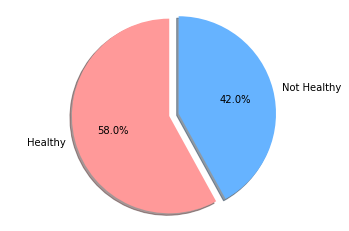

In [280]:
import collections

c = collections.Counter(y)
labels = ['Healthy', 'Not Healthy']
sizes = [c[1.0],c[0.0]]
print(c)
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## CoAT

#### Similarités

In [2]:
def polynomialSim(n,L,y,x):
  
  return ((L-abs(y-x)**n)/(L**n))

def sigmaEquals(nb1,nb2):
  """
  Sigma  mesure de similarité de 
  [egg,sugar,oil,tomato,butter,low-fat,salt,green]
  """
  return nb1==nb2

def sigmaNum(nb1,nb2):
  """
  Sigma Kcal,Fat
  """
  return polynomialSim(10,6.0,nb1,nb2)

def sigmaS_healthy(a,b,w):
  """
  w : list of weights
  a : list e.g [nbrooms1,area1]
  b : list e.g [nbrooms2,area2]
  """
  Salt1, Fat1, Kcal1, sugar1, egg1, butter1, oil1,green1,Lowfat1, tomato1= a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9]
  Salt2, Fat2, Kcal2, sugar2, egg2, butter2, oil2,green2,Lowfat2, tomato2= b[0],b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8],b[9]

  #weights between 0.01 and 0.64
  sigmaKl=sigmaNum(Kcal1,Kcal2)
  sigmaFt = sigmaNum(Fat1,Fat2)
  sigmaegg = sigmaNum(egg1,egg2)

  #categorical   
  sigmasalt=sigmaEquals(Salt1,Salt2)
  sigmasugar = sigmaEquals(sugar1,sugar2)
  sigmalfat= sigmaEquals(Lowfat1,Lowfat2)
  
  sigmabutter= sigmaEquals(butter1,butter2)
  sigmaoil= sigmaEquals(oil1,oil2)
  
  sigmatomat= sigmaEquals(tomato1,tomato2)
  sigmagreen= sigmaEquals(green1,green2)



  return w[0]*(sigmaFt )+w[1]* sigmaKl+w[2]*sigmasalt+w[3]*sigmasugar+w[4]*sigmaegg+w[5]*sigmabutter
  +w[6]*sigmaoil+w[7]*sigmalfat+w[8]*sigmatomat+w[9]*sigmagreen

def sigmaR(p1,p2):
  return p1==p2

In [40]:
param_modele = {"sigS" : sigmaS_healthy, "sigR" : sigmaR,"w":[0.67]*10,"labels" : y}
param_split  = {"split" : 0.61 }

CB_healthy = []
for i in range( 0,n):
  CB_healthy.append((X[i],y[i]))

co= coAT(CB_healthy,param_modele,param_split )
co.fit()
print(co.score())

[(array([ 0.,  6., 80.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]), 0.0), (array([  1.,  18., 577.,   1.,   0.,   0.,   1.,   0.,   0.,   0.]), 0.0), (array([  1.,  12., 264.,   0.,   1.,   0.,   1.,   0.,   1.,   0.]), 1.0), (array([  1.,   7., 369.,   0.,   0.,   0.,   1.,   0.,   0.,   0.]), 1.0), (array([  1.,  13., 171.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]), 0.0), (array([  0.,  13., 320.,   1.,   0.,   0.,   2.,   0.,   0.,   2.]), 1.0), (array([  0.,   7., 310.,   0.,   0.,   0.,   1.,   0.,   0.,   0.]), 1.0), (array([  0.,   9., 272.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]), 1.0), (array([  1.,   6., 438.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]), 1.0), (array([  1.,  24., 443.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]), 1.0), (array([  0.,  24., 244.,   1.,   0.,   0.,   2.,   0.,   0.,   0.]), 1.0), (array([  0.,  16., 350.,   1.,   1.,   1.,   0.,   0.,   0.,   0.]), 0.0), (array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]), 0.0), (array([  0.,  10., 304.,   0.,   0.,   0